### Import libaries

In [1]:
# import common library
import random
import operator
import datetime
import itertools
import functools
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import ds_common_utils
import opends
import opends.shorthand as shorthand
import opends.common_utils as common_utils
import opends.maths as maths
import opends.ML_shorthand as ML_shorthand
import opends.stats as stats

### read example file

In [3]:
filename = '/home/kuanpern/sample/csvs/patienttbl-1.sample.csv'
df = pd.read_csv(filename)

In [4]:
# select subsample
df = df.iloc[:500]
# date of birth
df['DOB'] = pd.to_datetime(df['DOB'])
# age 
df['AGE'] = [round(_.days/365.2422, 1) for _ in datetime.datetime.now() - df['DOB']]

In [5]:
# select columns (for demo purpose only)
sel_cols = ['ID', 'Name', 'DOB', 'AGE', 'CountryOfBirth', 'PostalCode', 'DateUpdated']
df = df[sel_cols]

In [6]:
df.iloc[:5]

ID                                  Name        DOB   AGE CountryOfBirth  \
0   1  8737BC48-440A-4111-B671-52EDEC7DE230 1999-07-27  19.1             sg   
1   2  2B809389-3758-4489-95B9-BAFFBD22AD4D 1993-12-04  24.8             sg   
2   3  CB5100B8-0425-4D87-A8E9-F78033D4E6F8 1999-02-07  19.6             sg   
3   4  D3135925-FFC7-4EC3-A717-1B9D456E1D22 1997-10-30  20.9            NaN   
4   5  763F26CB-0E96-4C0F-A222-9CC65CB15863 1999-09-04  19.0             sg   

   PostalCode              DateUpdated  
0    520356.0  2018-04-25 08:32:04.597  
1    140157.0  2018-04-25 08:32:04.597  
2    680158.0  2018-04-25 08:32:04.597  
3    589649.0  2018-04-25 08:32:04.597  
4    510138.0  2018-04-25 08:32:04.597

### Min, Max

In [7]:
# minimum and maximum index and values
values = list(df['AGE'].dropna().values)

In [8]:
shorthand.min_max_index(values)

((6.4, 59), (69.7, 43))

### Get Ranking

In [10]:
values = df['AGE'].values
rankings = shorthand.get_ranking(values)
df['Ranking'] = rankings

In [11]:
df.iloc[:5]

ID                                  Name        DOB   AGE CountryOfBirth  \
0   1  8737BC48-440A-4111-B671-52EDEC7DE230 1999-07-27  19.1             sg   
1   2  2B809389-3758-4489-95B9-BAFFBD22AD4D 1993-12-04  24.8             sg   
2   3  CB5100B8-0425-4D87-A8E9-F78033D4E6F8 1999-02-07  19.6             sg   
3   4  D3135925-FFC7-4EC3-A717-1B9D456E1D22 1997-10-30  20.9            NaN   
4   5  763F26CB-0E96-4C0F-A222-9CC65CB15863 1999-09-04  19.0             sg   

   PostalCode              DateUpdated  Ranking  
0    520356.0  2018-04-25 08:32:04.597      477  
1    140157.0  2018-04-25 08:32:04.597      443  
2    680158.0  2018-04-25 08:32:04.597      481  
3    589649.0  2018-04-25 08:32:04.597      463  
4    510138.0  2018-04-25 08:32:04.597      442

### Normalization

In [12]:
values = list(df['Ranking'].values)

In [13]:
# normalize only value
normed = shorthand.normalize(values)

In [14]:
df['Ranking_normed'] = normed
df.iloc[:5]

ID                                  Name        DOB   AGE CountryOfBirth  \
0   1  8737BC48-440A-4111-B671-52EDEC7DE230 1999-07-27  19.1             sg   
1   2  2B809389-3758-4489-95B9-BAFFBD22AD4D 1993-12-04  24.8             sg   
2   3  CB5100B8-0425-4D87-A8E9-F78033D4E6F8 1999-02-07  19.6             sg   
3   4  D3135925-FFC7-4EC3-A717-1B9D456E1D22 1997-10-30  20.9            NaN   
4   5  763F26CB-0E96-4C0F-A222-9CC65CB15863 1999-09-04  19.0             sg   

   PostalCode              DateUpdated  Ranking  Ranking_normed  
0    520356.0  2018-04-25 08:32:04.597      477        0.003824  
1    140157.0  2018-04-25 08:32:04.597      443        0.003551  
2    680158.0  2018-04-25 08:32:04.597      481        0.003856  
3    589649.0  2018-04-25 08:32:04.597      463        0.003711  
4    510138.0  2018-04-25 08:32:04.597      442        0.003543

### Classify items based on values

In [15]:
values = df['AGE'].dropna().values

# select percentiles to extract
perctls = [10, 30, 80]
thresholds = np.percentile(values, perctls)

print('thresholds are', list(thresholds))

thresholds are [12.49, 14.0, 21.720000000000002]


In [16]:
# choose label
labels = ['toddler', 'teenager', 'adult', 'elderly']

# initialize classifier
cls = shorthand.ThresholdNameClassifier(thresholds=thresholds, names=labels)

# categorize people
categories = cls.parse(df['AGE'])

In [18]:
# put back to df
df['AGE_category'] = categories
df.iloc[:5]

ID                                  Name        DOB   AGE CountryOfBirth  \
0   1  8737BC48-440A-4111-B671-52EDEC7DE230 1999-07-27  19.1             sg   
1   2  2B809389-3758-4489-95B9-BAFFBD22AD4D 1993-12-04  24.8             sg   
2   3  CB5100B8-0425-4D87-A8E9-F78033D4E6F8 1999-02-07  19.6             sg   
3   4  D3135925-FFC7-4EC3-A717-1B9D456E1D22 1997-10-30  20.9            NaN   
4   5  763F26CB-0E96-4C0F-A222-9CC65CB15863 1999-09-04  19.0             sg   

   PostalCode              DateUpdated  Ranking  Ranking_normed AGE_category  
0    520356.0  2018-04-25 08:32:04.597      477        0.003824        adult  
1    140157.0  2018-04-25 08:32:04.597      443        0.003551      elderly  
2    680158.0  2018-04-25 08:32:04.597      481        0.003856        adult  
3    589649.0  2018-04-25 08:32:04.597      463        0.003711        adult  
4    510138.0  2018-04-25 08:32:04.597      442        0.003543        adult

#### quick example on plotting (color selection)

In [19]:
# select age
_df = df.sort_values(by='AGE').dropna(subset=['AGE'])

In [20]:
# color by threshold-based category
labels = ['lightgreen', 'yellow', 'orange', 'brown']
cls = shorthand.ThresholdNameClassifier(thresholds=thresholds, names=labels)

In [21]:
# get color
colors = cls.parse(_df['AGE'])

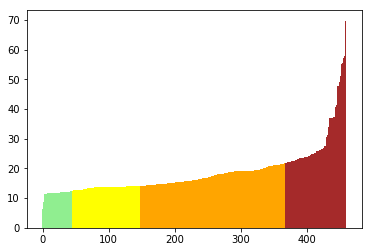

In [22]:
# actually plot
plt.bar(range(len(_df)), _df['AGE'], color=colors, width=1.5);

### Counters

In [24]:
counter = shorthand.count_elements(df['AGE_category'].values)
print(counter)

{'adult': 220, 'teenager': 102, 'toddler': 46, None: 40, 'elderly': 92}


In [25]:
# normalize dictionary
fitness = shorthand.normalize_dict(counter)
print(fitness)

{'elderly': 0.184, 'teenager': 0.204, 'toddler': 0.092, None: 0.08, 'adult': 0.44}


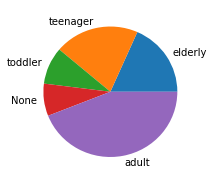

In [26]:
plt.pie(fitness.values(), labels=fitness.keys());
plt.gcf().set_size_inches(3, 3)

### Sampling from probability
note: simple but not the most efficient way
note: think simulated data generator

In [27]:
# make the sampler
sampler = stats.RouletteWheel(fitness=fitness)

In [29]:
# start sampling
for i in range(100):
    print(sampler.get(), end=', ')
# end for

elderly, adult, None, elderly, teenager, teenager, toddler, adult, None, teenager, adult, teenager, elderly, adult, None, adult, adult, None, adult, teenager, elderly, elderly, teenager, adult, None, adult, adult, adult, teenager, adult, adult, elderly, adult, teenager, adult, elderly, adult, None, adult, elderly, adult, adult, adult, adult, adult, elderly, teenager, teenager, adult, teenager, adult, adult, teenager, adult, adult, elderly, toddler, elderly, elderly, adult, adult, adult, adult, adult, adult, elderly, toddler, adult, teenager, teenager, teenager, None, None, None, teenager, adult, adult, elderly, elderly, elderly, adult, teenager, teenager, adult, teenager, teenager, elderly, adult, elderly, adult, adult, teenager, teenager, elderly, toddler, toddler, adult, adult, elderly, adult, 

### Simple statistics

In [31]:
values = df['AGE'].dropna().values

In [32]:
stats.simple_stats(values)

{'10%': 12.49,
 '30%': 14.0,
 '70%': 19.329999999999995,
 '90%': 25.14000000000001,
 'IQR': 6.85,
 'N': 460,
 'max': 69.7,
 'mean': 18.68695652173913,
 'median': 16.15,
 'min': 6.4,
 'stdev': 8.310666501175572,
 'sum': 8595.999999999989}

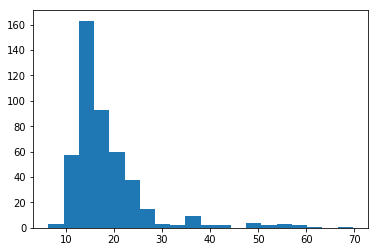

In [33]:
# for visualization purpose only
plt.hist(values, bins=20);

### Filter outliers

In [34]:
inliers, outliers, ranges = maths.filter_outliers(values, sig_thr=3)

In [35]:
ranges

[6.4, 26.9]

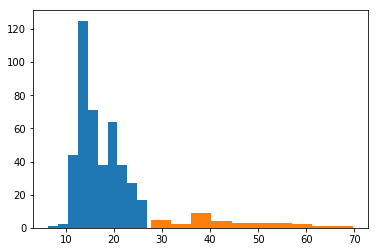

In [36]:
plt.hist(inliers);
plt.hist(outliers);

### Shuffling

In [37]:
print(values[:20])
print(shorthand.shuffle(values[:20]))

[19.1 24.8 19.6 20.9 19.  21.8 19.2 27.7 19.  19.  19.  19.  19.  19.
 19.  19.  19.  19.  19.4 19. ]
[19.2 19.1 19.  19.  21.8 19.  19.  19.  19.  20.9 19.  19.  27.7 19.
 19.  19.  19.4 24.8 19.6 19. ]


#### Sample parameters for distribution checks

In [38]:
iter_n = 40
sample_n = 100

In [39]:
# draws one sample
stats.simple_stats(shorthand.shuffle(values)[:sample_n])

{'10%': 12.7,
 '30%': 14.0,
 '70%': 19.0,
 '90%': 25.73,
 'IQR': 6.775,
 'N': 100,
 'max': 69.7,
 'mean': 18.691,
 'median': 15.0,
 'min': 6.4,
 'stdev': 9.51295006819651,
 'sum': 1869.1000000000001}

In [40]:
# draw many samples
S = []
for _iter in range(iter_n):
    out = stats.simple_stats(shorthand.shuffle(values)[:sample_n])
    S.append(out)
# end for

In [41]:
# show sample examples
_df = pd.DataFrame(S)
_df.iloc[:5]

10%    30%    70%    90%    IQR    N   max    mean  median   min  \
0  12.70  14.07  21.06  26.01  7.700  100  57.8  19.177   16.05   6.4   
1  12.67  14.20  19.13  26.78  6.575  100  69.7  20.043   16.45  11.5   
2  13.80  14.00  19.35  25.52  6.450  100  51.1  18.617   16.90  11.5   
3  12.28  13.97  19.00  23.53  6.625  100  62.7  18.219   16.20   8.7   
4  12.70  14.07  20.76  37.00  7.900  100  56.9  20.186   16.25  11.4   

       stdev     sum  
0   8.716534  1917.7  
1  10.757614  2004.3  
2   6.949936  1861.7  
3   7.736649  1821.9  
4  10.224481  2018.6

In [42]:
# make into parameters
params = []

z_thr = 2.5
for colname in _df.columns:
    u = _df[colname].mean()
    s = _df[colname].std()
    params.append([colname, u-s*z_thr, u+s*z_thr])
# end for

pd.DataFrame(params, columns=['label', 'l_bound', 'u_bound']).set_index('label').round(2).transpose()

label      10%    30%    70%    90%   IQR      N    max   mean  median    min  \
l_bound  11.44  13.72  17.73  19.17  4.38  100.0  38.73  16.70   14.17   4.93   
u_bound  13.75  14.34  21.20  31.59  8.66  100.0  78.32  20.56   18.13  14.61   

label    stdev      sum  
l_bound   4.71  1670.32  
u_bound  11.45  2056.17

### Adding dictionaries
useful for parallelized map-reduce implementation

In [43]:
values = list(df['AGE_category'].values)

In [44]:
# count number of element
shorthand.count_elements(values)

{None: 40, 'adult': 220, 'elderly': 92, 'teenager': 102, 'toddler': 46}

### split data into n-parts

In [45]:
sublists = shorthand.split_sublist(values, 10)

In [46]:
print(sublists[0][:10])
print(sublists[1][:10])
print(sublists[2][:10])

['adult', 'elderly', 'adult', 'adult', 'adult', 'elderly', 'adult', 'elderly', 'adult', 'adult']
['elderly', 'elderly', 'elderly', 'adult', None, None, None, None, 'elderly', 'elderly']
['adult', 'elderly', 'teenager', 'teenager', None, 'elderly', None, 'adult', None, 'adult']


#### examples on distributed counting

In [48]:
# count element in sublist 0
ele_count_0 = shorthand.count_elements(sublists[0])

In [49]:
# count element in sublist 1
ele_count_1 = shorthand.count_elements(sublists[1])

In [50]:
print(ele_count_0)
print(ele_count_1)

{'elderly': 12, None: 10, 'adult': 29}
{'adult': 15, 'teenager': 6, 'toddler': 3, None: 6, 'elderly': 21}


In [51]:
# add together
ele_count_sum = shorthand.add_dicts(ele_count_0, ele_count_1)

In [52]:
print(ele_count_sum)

{'teenager': 6, 'elderly': 33, 'toddler': 3, None: 16, 'adult': 44}


#### map reduce implementation

In [53]:
# divider
sublists = shorthand.split_sublist(values, 10)
# mapper
mapper = map(shorthand.count_elements, sublists)
# reducer
functools.reduce(shorthand.add_dicts, mapper)

{None: 40, 'adult': 220, 'elderly': 92, 'teenager': 102, 'toddler': 46}

#### pyspark implementation

In [54]:
# counts = sc.parallelize(values, 10).map(shorthand.count_elements).reduce(shorthand.add_dict)

#### multiprocessing implementation

In [55]:
from multiprocessing import Pool
n_thread = 4

In [56]:
sublists = shorthand.split_sublist(values, 10)

In [57]:
pool = Pool(n_thread)
results = pool.map(shorthand.count_elements, sublists)
pool.close()
pool.join()

In [58]:
results

[{None: 10, 'adult': 29, 'elderly': 12},
 {None: 6, 'adult': 15, 'elderly': 21, 'teenager': 6, 'toddler': 3},
 {None: 6, 'adult': 28, 'elderly': 6, 'teenager': 11},
 {None: 2, 'adult': 29, 'elderly': 7, 'teenager': 13},
 {None: 1, 'adult': 29, 'elderly': 12, 'teenager': 9},
 {None: 4, 'adult': 23, 'elderly': 10, 'teenager': 14},
 {None: 3, 'adult': 25, 'elderly': 5, 'teenager': 18},
 {None: 3, 'adult': 12, 'elderly': 8, 'teenager': 13, 'toddler': 15},
 {None: 3, 'adult': 14, 'elderly': 8, 'teenager': 10, 'toddler': 16},
 {None: 2, 'adult': 16, 'elderly': 3, 'teenager': 8, 'toddler': 12}]

In [59]:
results = functools.reduce(shorthand.add_dicts, results)

In [60]:
results

{None: 40, 'adult': 220, 'elderly': 92, 'teenager': 102, 'toddler': 46}

#### Example: distributed histogram and statistics

In [61]:
values = list(df['AGE'].dropna().values)

In [62]:
bins = np.linspace(5, 70, 14)

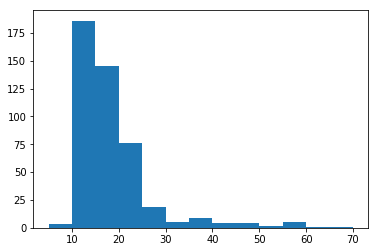

In [63]:
# show example
plt.hist(values, bins=bins);

In [64]:
def count_beans(data, bins=bins):
    return np.array(np.histogram(data, bins=bins)[0])
# end def

In [65]:
# split data
sublists = shorthand.split_sublist(values, 10)

# mapper
mapper = map(count_beans, sublists)
# reducer
counts = functools.reduce(operator.add, mapper)

In [66]:
# pyspark implementation
# sc.parallelize(values, 10).map(count_beans).reduce(operator.add)

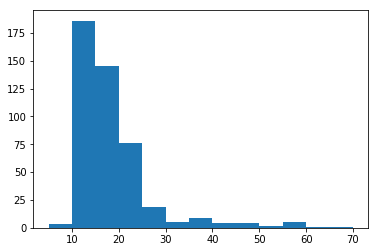

In [67]:
# draw
mids = (bins[:-1] + bins[1:])/2.
half_width = np.mean(np.diff(bins)) / 2.
plt.bar(mids, counts, width=2*half_width);

In [68]:
class ContSampler:
    def __init__(self, xs, ys):
        self.width = np.mean(np.diff(bins))
        self.fitness = shorthand.normalize_dict(dict(zip(mids, counts)))
        self.sampler = stats.RouletteWheel(fitness=self.fitness)
    # end def
    
    def draw(self, n=1):
        assert type(n) == int
        assert n >= 1
        output = [self.sampler.get() + (random.random()-0.5)*self.width for _ in range(n)]
        return output
    # end def
# end class

In [69]:
# make a sampler
sampler = ContSampler(mids, counts)

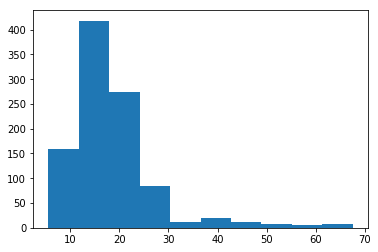

In [73]:
# show sample quality
plt.hist(sampler.draw(1000));

In [74]:
stats.simple_stats(sampler.draw(10000))

{'10%': 11.252339070353315,
 '30%': 13.705902058014917,
 '70%': 19.583969379341163,
 '90%': 26.128676185223206,
 'IQR': 7.463520744423212,
 'N': 10000,
 'max': 69.90046077542176,
 'mean': 18.533250872632188,
 'median': 16.479225523583622,
 'min': 5.007757838680407,
 'stdev': 8.765581234215992,
 'sum': 185332.5087263217}

In [75]:
stats.simple_stats(values)

{'10%': 12.49,
 '30%': 14.0,
 '70%': 19.329999999999995,
 '90%': 25.14000000000001,
 'IQR': 6.85,
 'N': 460,
 'max': 69.7,
 'mean': 18.68695652173913,
 'median': 16.15,
 'min': 6.4,
 'stdev': 8.310666501175572,
 'sum': 8595.999999999989}

### Machine Learning

#### cross-validation dataset

In [76]:
df['is_underage'] = df['AGE'] < 15

In [78]:
df

ID                                  Name        DOB   AGE  \
0      1  8737BC48-440A-4111-B671-52EDEC7DE230 1999-07-27  19.1   
1      2  2B809389-3758-4489-95B9-BAFFBD22AD4D 1993-12-04  24.8   
2      3  CB5100B8-0425-4D87-A8E9-F78033D4E6F8 1999-02-07  19.6   
3      4  D3135925-FFC7-4EC3-A717-1B9D456E1D22 1997-10-30  20.9   
4      5  763F26CB-0E96-4C0F-A222-9CC65CB15863 1999-09-04  19.0   
5      6  6D012E72-356F-4E5C-9461-708211B6D3C8 1996-12-13  21.8   
6      7  72947DA6-53FD-40BF-B2A1-1C6C8A6DD8C0 1999-06-17  19.2   
7      8  BE88152A-177D-4557-906E-B4BE9FC36762 1991-01-17  27.7   
8      9  C65606DE-4E2E-4D02-BDDB-9AE788203636 1999-08-31  19.0   
9     10  AB5C76C4-C08D-4EB2-839A-211EFCED11AB 1999-09-08  19.0   
10    11  4AE4B0FB-8E7B-441D-9083-2DAF30F033BC 1999-09-08  19.0   
11    12  A2AF6574-A4AB-4E15-973E-914D00C8E753 1999-09-07  19.0   
12    13  6127FA47-3AC4-4659-B5E2-DF507B28AEA6 1999-09-07  19.0   
13    14  DC9BF914-747F-41BD-96C4-F9FE3846F42F 1999-09-07  19.0   
14    15  39E4AFE9-A534-4BA7-B6B9-608A60111FD8 1999-09-08  19.0   
15    16  DD569B5E-605A-477B-9DF8-D537939C86CC 1999-09-07  19.0   
16    17  83CBBDE8-C737-4F1A-85BA-AE533C3483B7 1999-09-08  19.0   
17    18  338B48F4-EBBB-4E32-8A41-024A4B13B8DF 1999-09-07  19.0   
18    19  68C569C6-3466-43FD-9B7E-C36E3F499491 1999-04-21  19.4   
19    20  C0D44BE2-CC11-4E68-8D3C-5B9C55494158 1999-09-06  19.0   
20    21  CC9D9200-E00A-4E2F-B9EE-59E1CB3F917C 1999-08-31  19.0   
21    22  93A6ED67-C1D9-4A66-9826-B5F8E7E3F578 1999-09-10  19.0   
22    23  56FDF305-7E68-4516-8257-D34E7B085ED0 1999-09-08  19.0   
23    24  49721BFF-1970-4477-83DA-94E3B0B0FF24 1999-09-10  19.0   
24    25  1548A6EC-9151-41E2-BBAE-34C59732B979 1999-09-09  19.0   
25    26  5F4FD84B-8BA8-4AEE-A662-B56F4198788C 1999-09-09  19.0   
26    27  197873CA-4014-4759-B446-60B1FD2D3774 1999-09-09  19.0   
27    28  DE8770AD-C05E-46C6-AC47-171733E9906E 1999-09-07  19.0   
28    29  D4D25778-0BE0-4F1D-BE53-775A99BCA65B 1999-09-09  19.0   
29    30  40A6CA7A-F886-40D9-80A5-1EACB38B3DCB 1999-09-09  19.0   
..   ...                                   ...        ...   ...   
470  471  19A61B64-0F9F-4D7C-A39B-123C2CA1BB3E 2007-01-26  11.6   
471  472  3CEF20AA-A831-4BA5-99C4-FBC0F37FDE8C        NaT   NaN   
472  473  936DECDA-3700-48C4-A106-732C09343C76 2002-07-10  16.2   
473  474  6967EEFD-74AE-4ED6-8300-9F3FECAC3474 2003-06-19  15.2   
474  475  FE49646E-F8D3-4812-B2A1-38C464A490F9 2005-05-18  13.3   
475  476  CB069D96-E6B2-4EDC-990E-752DEA401CD8 1997-01-09  21.7   
476  477  018442C5-C0CC-47B4-A8FF-018E6F2253E1 2006-11-27  11.8   
477  478  32CB8B13-3796-40BA-A669-ECD9795B2B4D 1992-01-02  26.7   
478  479  76C1C39A-CAD5-4C98-ADE6-B92C026386A9 2003-04-09  15.4   
479  480  3D93283D-F06E-47D5-963E-8874C939BE47 2001-05-19  17.3   
480  481  A13A7E31-9796-4522-8F46-85E67EAD60E3 2005-11-26  12.8   
481  482  0B1D30B3-703C-410F-AA80-E5F3DEF3DA34 2007-02-07  11.6   
482  483  EA2D3A08-6698-4E03-9104-5BD61718BB13 2000-08-29  18.0   
483  484  9CF22A4D-D6AA-4F63-A6C3-DD4513AEDE2D 2007-02-07  11.6   
484  485  99FBC3CA-DE11-4DE1-B266-2C2B27F54442 1997-01-30  21.6   
485  486  E8458D11-7CE5-452F-A17B-5697B7AA6808 2003-03-31  15.5   
486  487  8B483210-CB0D-4A1D-A31C-1D28C51AEF23 2007-03-01  11.5   
487  488  C86DC2DB-3A18-4633-BDA5-9E1E1BCC2275 2005-04-06  13.4   
488  489  BCB8343D-01F2-49A6-B8C4-ED4CFB30F507 2004-10-24  13.9   
489  490  5328AA32-7E2E-48A4-A4C5-ECBA47627D48 2003-04-22  15.4   
490  491  B281E454-1520-43D3-BDBC-7630DBB0ED99 2005-06-21  13.2   
491  492  E7C64654-9A56-40CC-AE44-3D6DDEB2BA7F        NaT   NaN   
492  493  D28D9892-C2DF-49A3-A0FE-DFD3CDBFF07A 2007-03-23  11.5   
493  494  C4936086-CD24-421A-B707-CC0A3975FC79 2007-04-05  11.4   
494  495  8FC877B3-21AE-48AA-8C52-9C3A501618F1 2001-03-05  17.5   
495  496  7E9F51F0-DBEA-4622-8120-49B71A0148D2 2007-04-14  11.4   
496  497  A57C236E-1450-4059-ACE2-8C1498FB9D4A 2004-12-27  13.7   
497  498  08A45DF6-86B1-41F3-8E9D-601B6B6AED5C 2000-1

In [77]:
datasets = ML_shorthand.construct_CV_datasets(df, label_name='is_underage')

In [79]:
datasets[0]['training'].iloc[:3]

ID                                  Name        DOB   AGE  \
190  191  041394FB-1F56-4206-B596-C49A49F4B1E9 2000-07-22  18.1   
219  220  54BE4031-2301-4645-A05E-D421B2F8DE03        NaT   NaN   
274  275  A45CE45F-D16B-430E-92DF-E2E639CB643B 1995-02-12  23.6   

    CountryOfBirth  PostalCode              DateUpdated  Ranking  \
190             sg         NaN  2018-04-25 08:32:04.597      285   
219            NaN         NaN  2018-04-25 08:32:04.597      296   
274            NaN         NaN  2018-04-25 08:32:04.597      208   

     Ranking_normed AGE_category  is_underage  
190        0.002285        adult        False  
219        0.002373         None        False  
274        0.001667      elderly        False

In [80]:
datasets[0]['testing'].iloc[:3]

ID                                  Name        DOB   AGE  \
459  460  C4BFD16E-24DF-4180-BD35-CFE1F355EFE1 2003-07-17  15.2   
406  407  A81A2792-1EC9-49BF-871F-58F508021E86 2006-08-24  12.1   
462  463  6CC7F8B4-ABE6-42B5-ADEF-800A3B0DC5C6 2006-01-17  12.7   

    CountryOfBirth  PostalCode              DateUpdated  Ranking  \
459            NaN         NaN  2018-04-25 08:32:04.597       41   
406            NaN         NaN  2018-04-25 08:32:04.597       94   
462            NaN         NaN  2018-04-25 08:32:04.597       38   

     Ranking_normed AGE_category  is_underage  
459        0.000329        adult        False  
406        0.000754      toddler         True  
462        0.000305     teenager         True

#### sample balanced datasets

In [81]:
samples = ML_shorthand.sample_balance_datasets(df, 'is_underage')

In [83]:
len(samples)

4

In [84]:
samples[0].iloc[:3]

ID                                  Name        DOB   AGE  \
310  311  4117EEAC-3C12-4BF3-80CA-07AE434663BE 2001-03-19  17.5   
350  351  644D75E4-ABD1-46B3-9256-8B95BD1049C0 2006-01-14  12.7   
242  243  263B0B6D-CF89-470E-814F-0991BB369C05 2002-04-08  16.4   

    CountryOfBirth  PostalCode              DateUpdated  Ranking  \
310             sg         NaN  2018-04-25 08:32:04.597      236   
350            NaN         NaN  2018-04-25 08:32:04.597      137   
242            NaN         NaN  2018-04-25 08:32:04.597      253   

     Ranking_normed AGE_category  is_underage  
310        0.001892        adult        False  
350        0.001098     teenager         True  
242        0.002028        adult        False

In [85]:
for i in range(len(samples)):
    print('sample %d composition: %s' % (i+1, str(shorthand.count_elements(samples[0]['is_underage'])),))

sample 1 composition: {False: 189, True: 189}
sample 2 composition: {False: 189, True: 189}
sample 3 composition: {False: 189, True: 189}
sample 4 composition: {False: 189, True: 189}


### Binary Prediction Assessment

In [86]:
predictions = df['AGE'] < 20
labels = df['is_underage']

#### compute confusion matrix

In [87]:
conf_mat = stats.compute_confusion_matrix(predictions, labels)
conf_mat

{'FN': 0, 'FP': 145, 'TN': 166, 'TP': 189}

#### confusion matrix assessment

In [88]:
stats.binary_classification_assessment(conf_mat)

{'ACC': 0.71,
 'BM': 0.5337620578778135,
 'F1': 0.722753346080306,
 'FDR': 0.4341317365269461,
 'FN': 0.0,
 'FNR': 0.0,
 'FOR': 0.0,
 'FP': 145.0,
 'FPR': 0.4662379421221865,
 'MCC': 9.627048154494868e-06,
 'MK': 0.5658682634730539,
 'NPV': 1.0,
 'PPV': 0.5658682634730539,
 'TN': 166.0,
 'TNR': 0.5337620578778135,
 'TP': 189.0,
 'TPR': 1.0}

## Others

### Quickly turn structure data into an object

In [89]:
df.iloc[:5]

ID                                  Name        DOB   AGE CountryOfBirth  \
0   1  8737BC48-440A-4111-B671-52EDEC7DE230 1999-07-27  19.1             sg   
1   2  2B809389-3758-4489-95B9-BAFFBD22AD4D 1993-12-04  24.8             sg   
2   3  CB5100B8-0425-4D87-A8E9-F78033D4E6F8 1999-02-07  19.6             sg   
3   4  D3135925-FFC7-4EC3-A717-1B9D456E1D22 1997-10-30  20.9            NaN   
4   5  763F26CB-0E96-4C0F-A222-9CC65CB15863 1999-09-04  19.0             sg   

   PostalCode              DateUpdated  Ranking  Ranking_normed AGE_category  \
0    520356.0  2018-04-25 08:32:04.597      477        0.003824        adult   
1    140157.0  2018-04-25 08:32:04.597      443        0.003551      elderly   
2    680158.0  2018-04-25 08:32:04.597      481        0.003856        adult   
3    589649.0  2018-04-25 08:32:04.597      463        0.003711        adult   
4    510138.0  2018-04-25 08:32:04.597      442        0.003543        adult   

   is_underage  
0        False  
1        False  
2        False  
3        False  
4        False

In [90]:
# make to dictionary
obj_dict = df.iloc[0].to_dict()
obj_dict

{'AGE': 19.1,
 'AGE_category': 'adult',
 'CountryOfBirth': 'sg',
 'DOB': Timestamp('1999-07-27 00:00:00'),
 'DateUpdated': '2018-04-25 08:32:04.597',
 'ID': 1,
 'Name': '8737BC48-440A-4111-B671-52EDEC7DE230',
 'PostalCode': 520356.0,
 'Ranking': 477,
 'Ranking_normed': 0.0038236472945891785,
 'is_underage': False}

In [91]:
# make into an object
patient = shorthand.Struct(obj_dict)

In [92]:
# access data of the object
print(patient.AGE)
print(patient.CountryOfBirth)

19.1
sg


### Symmetry key encryption

In [93]:
# declare encrytor
encrytor = shorthand.SimpleEncryptor()

In [94]:
# select secret key
secret_key = 'foobar'

In [95]:
# test data
data = df.iloc[0].to_json()
data

'{"ID":1,"Name":"8737BC48-440A-4111-B671-52EDEC7DE230","DOB":933033600000,"AGE":19.1,"CountryOfBirth":"sg","PostalCode":520356.0,"DateUpdated":"2018-04-25 08:32:04.597","Ranking":477,"Ranking_normed":0.0038236473,"AGE_category":"adult","is_underage":false}'

In [96]:
# actually encrypt
encrypted_msg = encrytor.simple_encrypt(data, secret_key=secret_key)
encrypted_msg

b'Thzca6/AmW+AsKMd1J1u7J7ZKX0/f+VEHCbJ6JoVcnOS+GxPxSS4DemtXR/v5o6lpDoLZaFbVdk3H+rxluQG9KxFrqKP1M5g4a91GiEOmDnpDNiP8Iu0huBrtpUBCPfPf3Y2xQp9++ffD7vZsSij8pShaoG7uRA3axxUxVEfoJbuVbs6nyHY5UAbRM8E44YH7+4YjhsttAD6iKjkwHSLqdeqagojs8AP7/E9cyYSD4FXZWqpO8A6QgsMG95su4LARtCMwx5U+OmjD2QdS87+vjb5bg5Ks2njdWJ115GJJzWqk1+sqjQIcVAZKaeNjlO8TUIuAwEMBG40zlgtI3FGxwLm7H/7D+/vNU7E+9rQl40='

In [97]:
# decryption
decrypted_msg = encrytor.simple_decrypt(encrypted_msg, secret_key=secret_key)
decrypted_msg

'{"ID":1,"Name":"8737BC48-440A-4111-B671-52EDEC7DE230","DOB":933033600000,"AGE":19.1,"CountryOfBirth":"sg","PostalCode":520356.0,"DateUpdated":"2018-04-25 08:32:04.597","Ranking":477,"Ranking_normed":0.0038236473,"AGE_category":"adult","is_underage":false}'

### get attribute of an obj

In [98]:
shorthand.getattrs(patient)('__repr__')()

'<opends.shorthand.Struct object at 0x7fbe64875198>'

### Formatting related

In [99]:
# is integer
dets = list(map(shorthand.isint, df['AGE']))
df['AGE_IS_INT'] = dets
df[['AGE', 'AGE_IS_INT']].iloc[:5]

AGE  AGE_IS_INT
0  19.1       False
1  24.8       False
2  19.6       False
3  20.9       False
4  19.0        True

In [100]:
# is nan
dets = list(map(shorthand.isnan, df['CountryOfBirth']))
df['CTY_IS_NULL'] = dets
df[['CountryOfBirth', 'CTY_IS_NULL']].iloc[:5]

CountryOfBirth  CTY_IS_NULL
0             sg        False
1             sg        False
2             sg        False
3            NaN         True
4             sg        False

### date functions

In [101]:
shorthand.today()

'2018-09-14'

In [102]:
help(shorthand.retry_func)

Help on function retry_func in module opends.shorthand:

retry_func(max_retry=5, wait_secs=0)
    A decorator to retry function call automatically after waiting for a few secs
    
    Args:
        :max_retry (Int): number of times to retry
        :wait_secs (Float): number of seconds to wait before retry
    
    Returns:
        :Func



In [ ]:
shorthand.yesterday()

In [ ]:
shorthand.tomorrow()

In [ ]:
# next week
shorthand.next_day(7)

In [ ]:
# previous week
shorthand.next_day(-7)